<p><center style="color:#28838a; font-family: 'Dancing Script', cursive; font-size:25px;">Определение покупательской активности клиентов</center></p>

<p style="text-align: center;"><b><span style="color: #28838a; font-family: 'verdana'; font-size: 25px;">📖</span></b></p>



###### Задачи:

* построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
* В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
* Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


<br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаги, необходимые для решения поставленных задач:</strong></a><br>

<a id="toc"></a>
   
* [0. Краткая справка](#0) 
* [1. Загрузка данных](#1)
* [2. Предобработка данных](#2)
* [3. Исследовательский анализ данных](#3)
* [4. Объединение таблицl](#4)
* [5. Корреляционный анализ](#5)
* [6. Использование пайплайнов](#6)
* [7. Анализ важности признаков](#7)
* [8. Сегментация покупателей](#8)
* [9. Общий вывод](#9)

In [1]:
!pip install -U scikit-learn -q 

In [2]:
pip install phik

In [3]:
!pip install sweetviz

In [4]:
!pip install shap 

In [5]:
import pandas as pd
from pandas import Index

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
import scipy.stats as stats
import datetime
from math import factorial

import copy
from sklearn import preprocessing
from sklearn import utils
from sklearn import ensemble
from sklearn.pipeline import Pipeline
import math
import shap

import warnings
warnings.filterwarnings("ignore")

from scipy import stats as st
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

from phik.report import plot_correlation_matrix
from phik import report

import sweetviz as sv



C:\Users\Elena\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###### Краткая справка:
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.


## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 1. Загрузка данных</strong></a><br>

In [6]:
try:
    data_market_file = pd.read_csv('/datasets/market_file.csv', delimiter = ",",decimal=".") 
    data_market_money = pd.read_csv('/datasets/market_money.csv', delimiter = ",", decimal=".") 
    data_market_time = pd.read_csv('/datasets/market_time.csv', delimiter = ",", decimal=",") 
    data_money = pd.read_csv('/datasets/money.csv', delimiter = ";", decimal=",")
except:
    data_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', delimiter = ",", decimal=".") 
    data_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', delimiter = ",", decimal=".") 
    data_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', delimiter = ",", decimal=",")
    data_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', delimiter = ";", decimal=",")

In [7]:
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [8]:
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [9]:
# Отображение всех колонок при выводе на печать
pd.set_option('display.max_columns', None)

In [10]:
# напишем функцию для оптимизации размеров таблиц
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                            .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df

In [11]:
display(data_market_file.head())
data_market_file.tail()
data_market_file.sample()

data_market_file.info(memory_usage='deep')

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Датафрейм ‘data_market_file’ имеет 13 столбцов и 1300 строк без пропусков. Вес датафрейма 753.5 Кб.

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
•	id — номер покупателя в корпоративной базе данных.
•	Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
•	Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
•	Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
•	Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
•	Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
•	Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
•	Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
•	Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
•	Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
•	Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
•	Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
•	Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


In [12]:
# Уникальные идентификаторы
print(len(data_market_file['id'].unique()), 'уникальных значений из', data_market_file['id'].count(), 'строк')
print('От', data_market_file['id'].min(), 'до', data_market_file['id'].max())

1300 уникальных значений из 1300 строк
От 215348 до 216647


Дубликатов идентификаторов не обнаружено.

In [13]:

print(len(data_market_file['Покупательская активность'].unique()), 'уникальных значений из', data_market_file['Покупательская активность'].count(), 'строк')
print('От', data_market_file['Покупательская активность'].min(), 'до', data_market_file['Покупательская активность'].max())

2 уникальных значений из 1300 строк
От Прежний уровень до Снизилась


In [14]:
data_market_file['Покупательская активность'].value_counts()

Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

Целевой признак для нашей задачи – Покупательская активность, т.е. модель, которую мы попытаемся построить, будет предсказывать значение 1 если клиент уйдет или 0 если нет. В этом заключается наша задача классификации, т.к. целевой признак является категориальным.

In [15]:
data_market_file['Тип сервиса'].value_counts()

Тип сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64

In [16]:
data_market_file['Разрешить сообщать'].value_counts()

Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64

In [17]:
data_market_file['Популярная_категория'].value_counts()

Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

Обнаружены неявные дубликаты в 'Тип сервиса'. Удалим их в предобработке данных.

<Axes: >

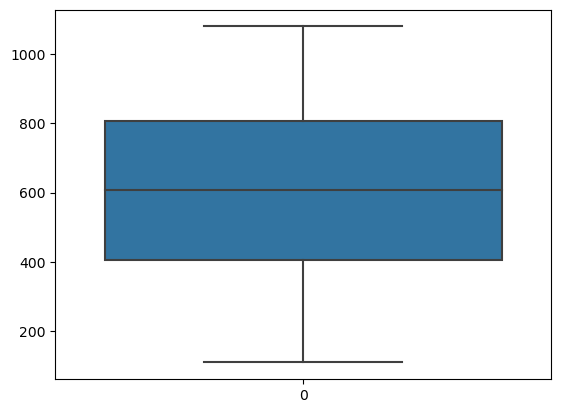

In [18]:
sns.boxplot(data_market_file['Длительность'])

Проверили на наличие дубликатов, удалим их при проведении предобработки данных. Целевой признак Покупательская активность состоит из двух категорий: снизилась и прежний уровень.Наибольшее число покупателей, те которые зарегистрировались от 400 до 800 дней назад.Наибольшее количество покупателей смотрит от 5 до 10 страниц, около 3 категорий за визит

In [19]:
display(data_market_money.head())
data_market_money.tail()
data_market_money.sample()

data_market_money.info(memory_usage='deep')

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 495.2 KB


Датафрейм ‘data_market_money’ имеет 3 столбца и 3900 строк без пропусков. Вес датафрейма 704,7 Кб.

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
•	id — номер покупателя в корпоративной базе данных.
•	Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
•	Выручка — сумма выручки за период.


In [20]:
data_market_money['Период'].value_counts()

Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

In [21]:
data_market_money.isnull().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [22]:
data_market_money['Выручка'] = pd.to_numeric(data_market_money['Выручка'])

In [23]:
data_market_money.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 495.2 KB


<Axes: >

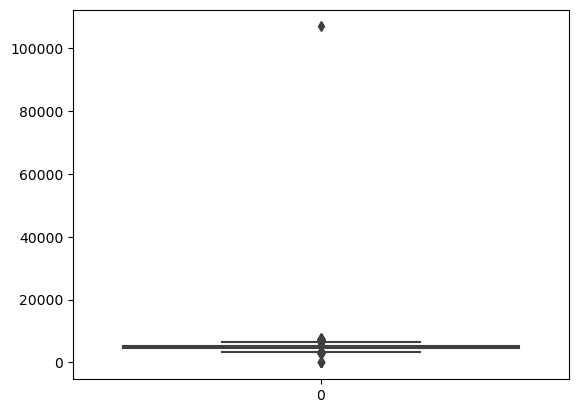

In [24]:
sns.boxplot(data_market_money['Выручка'])

In [25]:
data_market_money['Выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

In [26]:
print(data_market_money.loc[data_market_money['Выручка'] == 106862.203125]) 

Empty DataFrame
Columns: [id, Период, Выручка]
Index: []


In [27]:
data_market_money = data_market_money
data_market_money.loc[98, 'Выручка'] = data_market_money['Выручка'].median()
print(data_market_money)

          id               Период  Выручка
0     215348  препредыдущий_месяц      0.0
1     215348        текущий_месяц   3293.1
2     215348     предыдущий_месяц      0.0
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3900 rows x 3 columns]


<Axes: >

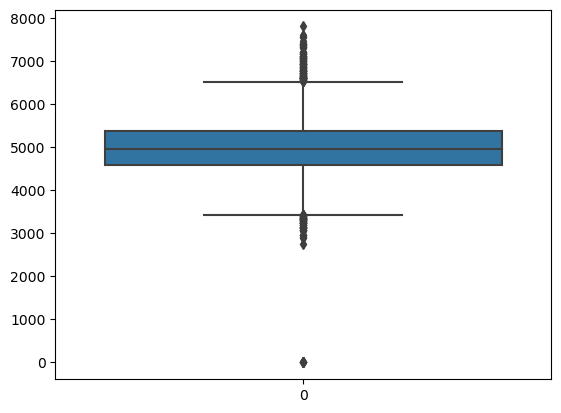

In [28]:
sns.boxplot(data_market_money['Выручка'])

Обнаружен выброс в столбце 'Выручка', заменим его на медианное значение, т.к он может повлиять на работу модели.

Таблица с данными о выручке, которую получает магазин с покупателя, обнаружено аномальнобольшое значение, которое было заменено на медианное. Имеются показатели выручки равные 0, что может соответствовать тому, что покупатель не совершал покупок в периоде. Пропусков нет. Наибольшее количество покупателей приносит выручку от 4500 до 5500.

In [29]:
display(data_market_time.head())
data_market_time.tail()
data_market_time.sample()

data_market_time.info(memory_usage='deep')

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 322.6 KB


Датафрейм ‘data_market_time’ имеет 3 столбца и 2600 строк без пропусков. Вес датафрейма 704,7 Кб.

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
•	id — номер покупателя в корпоративной базе данных.
•	Период — название периода, во время которого зафиксировано общее время.
•	минут — значение времени, проведённого на сайте, в минутах.


In [30]:
data_market_time['Период'].value_counts()

Период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

In [31]:
data_market_time = data_market_time.rename(columns={'Период':'Период_time'})

<Axes: >

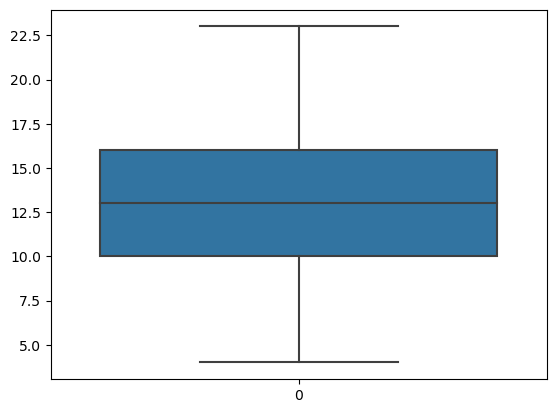

In [32]:
sns.boxplot(data_market_time['минут'])

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода выбросы и пропуски отсутствуют. Столбец Период был переименован в Период_time, т.к столбец с таким названием уже имеется.

In [33]:
display(data_money.head())
data_money.tail()
data_money.sample()

data_money.info(memory_usage='deep')

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Датафрейм ‘data_money’ имеет 2 столбца и 1300 строк без пропусков. Вес датафрейма 20,4 Кб.

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
•	id — номер покупателя в корпоративной базе данных.
•	Прибыль — значение прибыли.


Пропуски и выбросы отсутствуют. Наибольшее число покупателей приносит прибыль от 3 до 5.

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 2. Предобработка данных</strong></a><br>

Корректировка типов данных столбцов, оптимизация размеров таблиц.

In [34]:
optimize_memory_usage(data_market_file)

Размер использования памяти: до  0.13 Mb - после  0.06 Mb (50.9%)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [35]:
optimize_memory_usage(data_market_money)

Размер использования памяти: до  0.09 Mb - после  0.06 Mb (33.3%)


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.000000
1,215348,текущий_месяц,3293.100098
2,215348,предыдущий_месяц,0.000000
3,215349,препредыдущий_месяц,4472.000000
4,215349,текущий_месяц,4971.600098
...,...,...,...
3895,216646,препредыдущий_месяц,4725.000000
3896,216646,предыдущий_месяц,4923.000000
3897,216647,предыдущий_месяц,4720.000000
3898,216647,препредыдущий_месяц,5183.000000


In [36]:
optimize_memory_usage(data_market_time)

Размер использования памяти: до  0.06 Mb - после  0.03 Mb (45.7%)


,id,Период_time,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [37]:
optimize_memory_usage(data_money)

Размер использования памяти: до  0.02 Mb - после  0.01 Mb (49.7%)


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


Провели оптимизацию размеров датафреймов, изменили тип столбцов и уменьшили размер от 33% до 49,7%

In [38]:
data_market_file['Тип сервиса'] = data_market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [39]:
data_market_file['Тип сервиса'].value_counts()

Тип сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

Удалили дубликаты в столбце Тип сервиса

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 3. Исследовательский анализ данных</strong></a><br>

In [40]:
data_market_file["Маркет_актив_6_мес"] = pd.to_numeric(data_market_file["Маркет_актив_6_мес"])
data_market_file["Акционные_покупки"] = pd.to_numeric(data_market_file["Акционные_покупки"])

In [41]:
data_market_file_not_id = data_market_file.drop(columns=['id'], axis=1)

In [42]:
cat_cols_data_market_file = [col for col in data_market_file_not_id.columns if data_market_file_not_id[col].dtype == 'object']
num_cols_data_market_file = [col for col in data_market_file_not_id.columns if data_market_file_not_id[col].dtype != 'object']

In [43]:
num_cols_data_market_file

['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит']

In [44]:
# looking at unique values in categorical columns

for col in cat_cols_data_market_file:
    print(f"{col} has {data_market_file[col].unique()} values\n")

Покупательская активность has ['Снизилась' 'Прежний уровень'] values

Тип сервиса has ['премиум' 'стандарт'] values

Разрешить сообщать has ['да' 'нет'] values

Популярная_категория has ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'] values



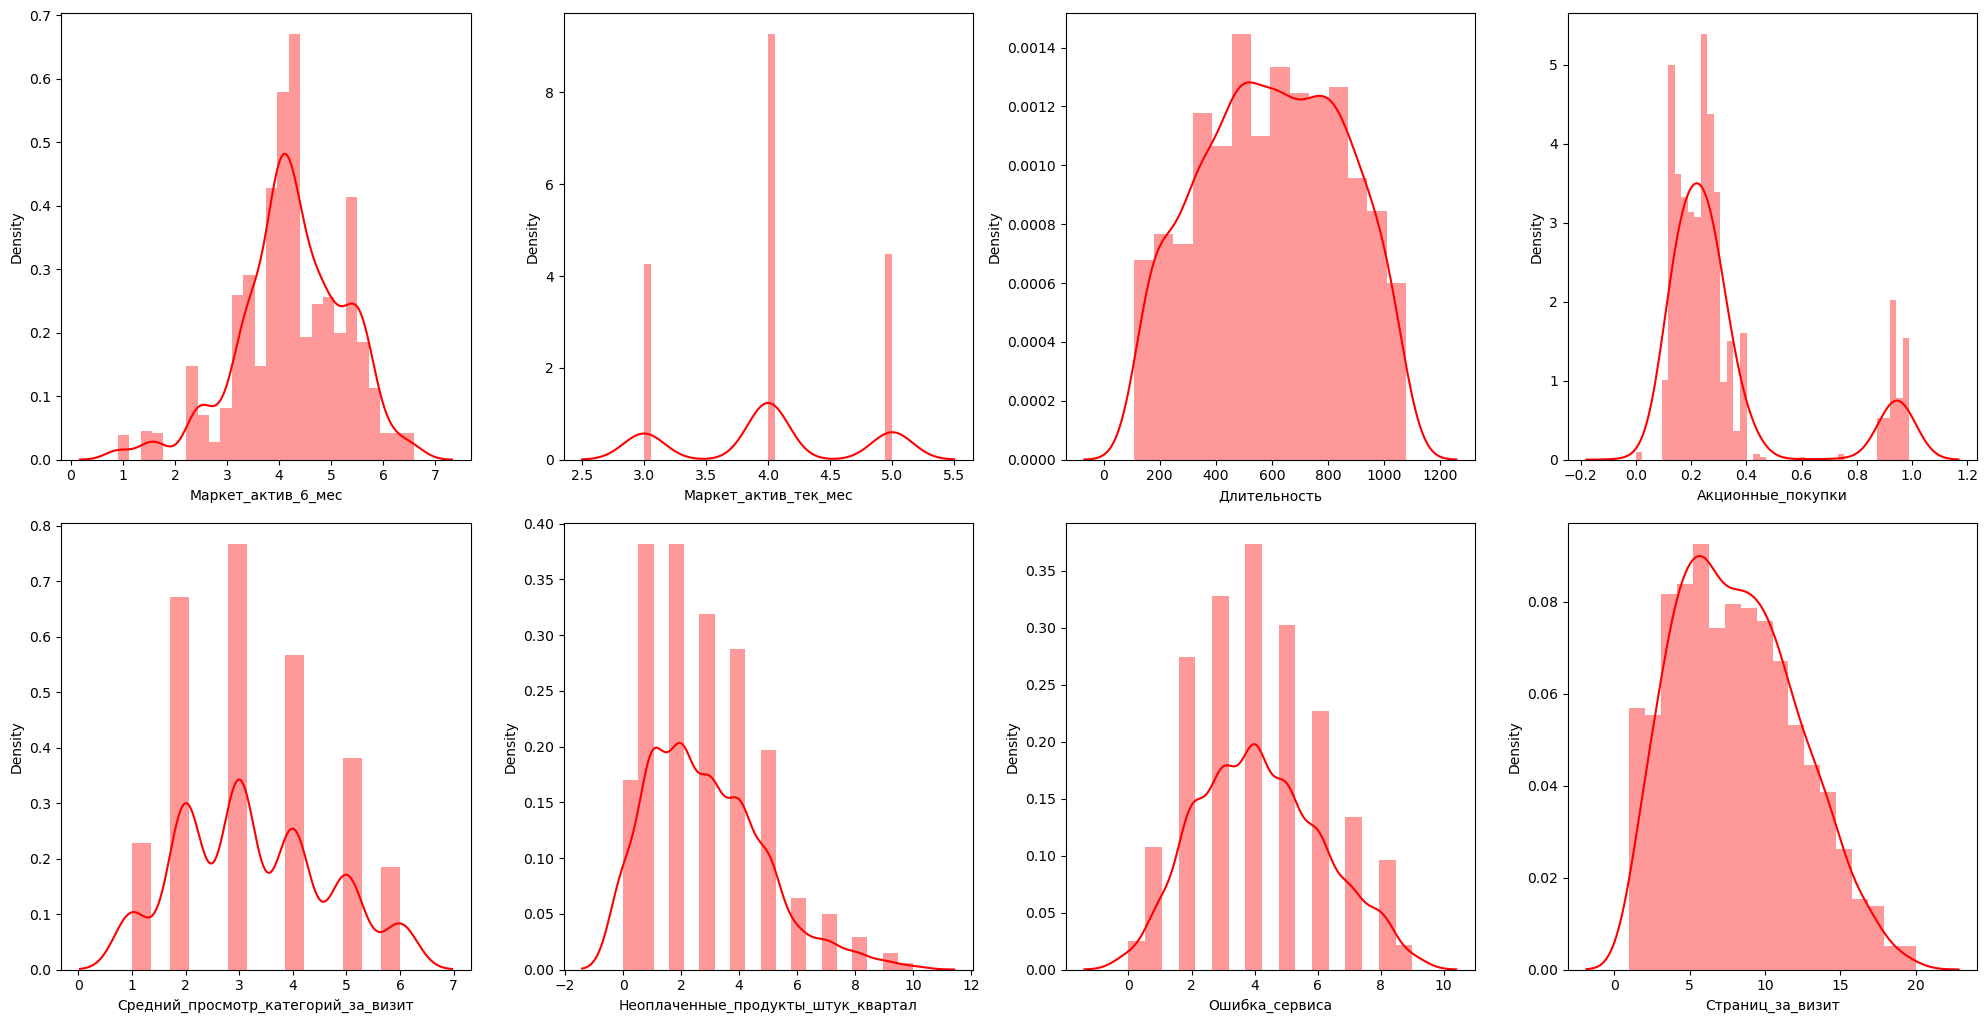

In [45]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols_data_market_file:
    if plotnumber <= 10:
        ax = plt.subplot(3, 4, plotnumber)
        sns.distplot(data_market_file_not_id[column],color='red',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

В среднем покупатели пользуются данным магазином 300-1000 дней, просматривают за визит 5-12 страниц, просматривая 2-5 категорий товаров.

Создадим функции для визуализации количественных и категорийных значений

In [46]:
# Группировка значений
def data_market(data, column):
    if column in data_market_file.columns:
        result = data.groupby([column])[column].agg(['count']).sort_values(by='count')
    result['percent'] = result['count'] / result['count'].sum()
    return result

In [47]:
# Функции визуализации столбцов с качественными данными
def quality_data_market(data, column, xlabel, ylabel, title):
    print('Название столбца:', column)
    go = data_market(data, column)
    go.columns = {'Количество':'count', 'Доля':'percent'}
    
    #quality_go_groupby(data, column).plot(kind='bar')
    
    plt.barh(
        go.index, 
        go['Количество'].values,
        color='darkorange', 
        edgecolor='black'
    )
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    print('Значения датафрейма:')
    print(go)
    print('\nОписание датафрейма:')
    print(go.describe())

Проведем исследовательский анализ всех признаков data_market_file

Название столбца: Тип сервиса


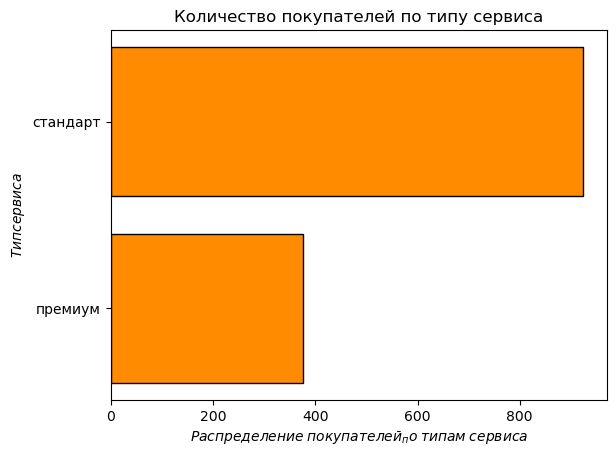

Значения датафрейма:
             Количество      Доля
Тип сервиса                      
премиум             376  0.289231
стандарт            924  0.710769

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   650.000000  0.500000
std    387.494516  0.298073
min    376.000000  0.289231
25%    513.000000  0.394615
50%    650.000000  0.500000
75%    787.000000  0.605385
max    924.000000  0.710769


In [48]:
quality_data_market(
    data_market_file, 
    'Тип сервиса', 
    'Распределение_ покупателей_по_ типам_ сервиса', 
    'Тип сервиса', 
    'Количество покупателей по типу сервиса'
)

Среди покупателей Преобладает тип сервиса стандарт.

Название столбца: Популярная_категория


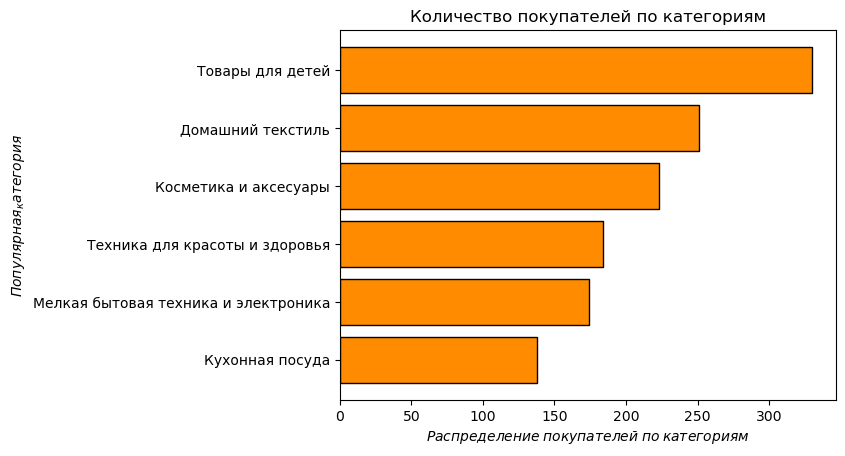

Значения датафрейма:
                                      Количество      Доля
Популярная_категория                                      
Кухонная посуда                              138  0.106154
Мелкая бытовая техника и электроника         174  0.133846
Техника для красоты и здоровья               184  0.141538
Косметика и аксесуары                        223  0.171538
Домашний текстиль                            251  0.193077
Товары для детей                             330  0.253846

Описание датафрейма:
       Количество      Доля
count    6.000000  6.000000
mean   216.666667  0.166667
std     68.028425  0.052330
min    138.000000  0.106154
25%    176.500000  0.135769
50%    203.500000  0.156538
75%    244.000000  0.187692
max    330.000000  0.253846


In [49]:
quality_data_market(
    data_market_file, 
    'Популярная_категория', 
    'Распределение_ покупателей_ по_ категориям', 
    'Популярная_категория', 
    'Количество покупателей по категориям'
)

Категория наиболее пользующаяся спросом это товары для детей и категория аутсайдер: кухонная посуда

Название столбца: Покупательская активность


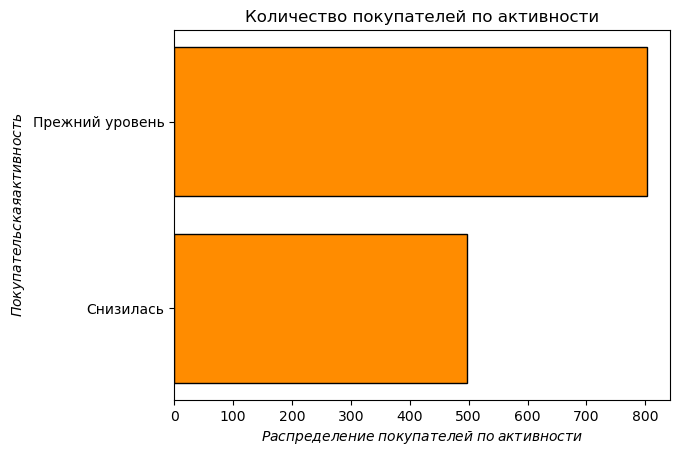

Значения датафрейма:
                           Количество      Доля
Покупательская активность                      
Снизилась                         498  0.383077
Прежний уровень                   802  0.616923

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   650.000000  0.500000
std    214.960461  0.165354
min    498.000000  0.383077
25%    574.000000  0.441538
50%    650.000000  0.500000
75%    726.000000  0.558462
max    802.000000  0.616923


In [50]:
quality_data_market(
    data_market_file, 
    'Покупательская активность', 
    'Распределение_ покупателей_ по_ активности', 
    'Покупательская активность', 
    'Количество покупателей по активности'
)

Больше покупателей по прежнему доверяют магазину.

Как уже отмечалось большинство покупателей приносят выручку от 4500 до 5500. 

In [51]:
data_market_money_not_id = data_market_money.drop(columns=['id'], axis=1)

In [52]:
cat_cols_data_market_money = [col for col in data_market_money_not_id.columns if data_market_money_not_id[col].dtype == 'object']
num_cols_data_market_money = [col for col in data_market_money_not_id.columns if data_market_money_not_id[col].dtype != 'object']


In [53]:
num_cols_data_market_money

['Выручка']

In [54]:
for col in cat_cols_data_market_money:
    print(f"{col} has {data_market_money[col].unique()} values\n")

Период has ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'] values



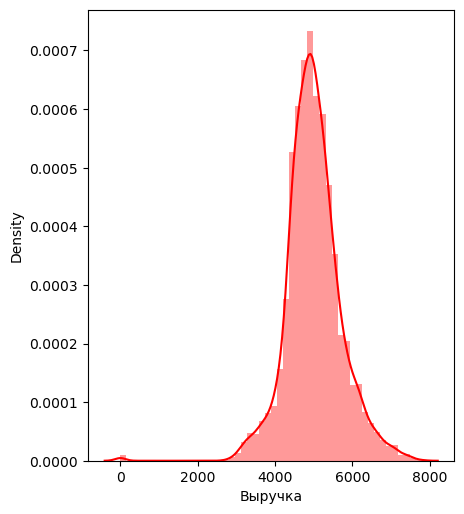

In [55]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols_data_market_money:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_market_money_not_id[column],color='red',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Средняя выручка от покупателя колеблется от 4500-6000

In [56]:
data_market_time_not_id = data_market_time.drop(columns=['id'], axis=1)

In [57]:
cat_cols_data_market_time = [col for col in data_market_time_not_id.columns if data_market_time_not_id[col].dtype == 'object']
num_cols_data_market_time = [col for col in data_market_time_not_id.columns if data_market_time_not_id[col].dtype != 'object']

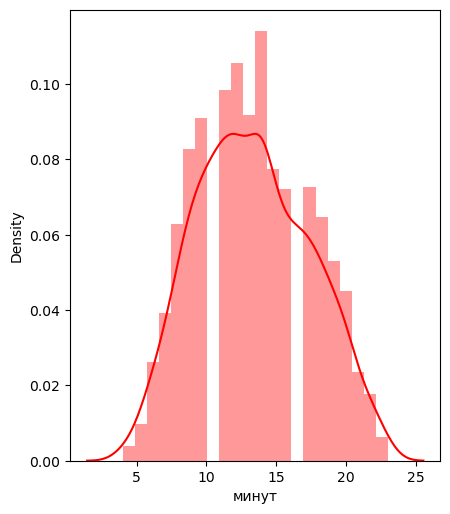

In [58]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols_data_market_time:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_market_time_not_id[column],color='red',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Среднее время пользования магазином составляет 10-17 минут

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 

In [59]:
data_market_money

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.000000
1,215348,текущий_месяц,3293.100098
2,215348,предыдущий_месяц,0.000000
3,215349,препредыдущий_месяц,4472.000000
4,215349,текущий_месяц,4971.600098
...,...,...,...
3895,216646,препредыдущий_месяц,4725.000000
3896,216646,предыдущий_месяц,4923.000000
3897,216647,предыдущий_месяц,4720.000000
3898,216647,препредыдущий_месяц,5183.000000


In [60]:
data_market_money_bad = data_market_money.loc[data_market_money['Выручка'] == 0]

In [61]:
print(len(data_market_money_bad))

6


In [62]:
data_market_money_bad['id'].unique()

array([215348, 215357, 215359])

Покупателей, которые не совершали покупки необходимо удалить из таблиц

In [63]:
index_names_1 = data_market_file[ (data_market_file['id'] == 215348) | (data_market_file['id'] == 215357)| (data_market_file['id'] == 215359)].index 
  
# drop these row indexes 
# from dataFrame 
data_market_file.drop(index_names_1, inplace = True) 

In [64]:
index_names_2 = data_market_money[ (data_market_money['id'] == 215348) | (data_market_money['id'] == 215357)| (data_market_money['id'] == 215359)].index 
  
# drop these row indexes 
# from dataFrame 
data_market_money.drop(index_names_2, inplace = True) 

In [65]:
index_names_3 = data_market_time[ (data_market_time['id'] == 215348) | (data_market_time['id'] == 215357)| (data_market_time['id'] == 215359)].index 
  
# drop these row indexes 
# from dataFrame 
data_market_time.drop(index_names_3, inplace = True) 

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 4. Объединение таблиц</strong></a><br>

Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [66]:
data_market_money_t = data_market_money.pivot(index=['id'], columns='Период', values='Выручка').reset_index()

In [67]:
data_market_time_t = data_market_time.pivot(index=['id'], columns='Период_time', values='минут').reset_index()

Переименуем одноименные столбцы в data_market_time_t

In [68]:
data_market_time_t = data_market_time_t.rename(columns={'предыдцщий_месяц':'предыдущий_месяц_time'})
data_market_time_t = data_market_time_t.rename(columns={'текущий_месяц':'текущий_месяц_time'})

In [69]:
data_market_money_t

Период,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.600098
1,215350,5457.5,4826.0,5058.399902
2,215351,6158.0,4793.0,6610.399902
3,215352,5807.5,4594.0,5872.500000
4,215353,4738.5,5124.0,5388.500000
...,...,...,...,...
1292,216643,3664.0,4704.0,4741.700195
1293,216644,4729.0,5299.0,5353.000000
1294,216645,5160.0,5334.0,5139.200195
1295,216646,4923.0,4725.0,5224.600098


In [70]:
data_market_file = data_market_file.set_index('id') 


In [71]:
data_market_file

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7


In [72]:
data_market_money_t = data_market_money_t.set_index('id')
data_market_time_t = data_market_time_t.set_index('id')

In [73]:
data_market_time_t

Период_time,предыдущий_месяц_time,текущий_месяц_time
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [74]:
data_market_money_t

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.600098
215350,5457.5,4826.0,5058.399902
215351,6158.0,4793.0,6610.399902
215352,5807.5,4594.0,5872.500000
215353,4738.5,5124.0,5388.500000
...,...,...,...
216643,3664.0,4704.0,4741.700195
216644,4729.0,5299.0,5353.000000
216645,5160.0,5334.0,5139.200195


In [75]:
df_full = data_market_file.join(data_market_money_t)

In [76]:
df_full

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.600098
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.399902
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.399902
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.500000
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.700195
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.000000
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.200195


In [77]:
data_market_full = df_full.join(data_market_time_t)

In [78]:
data_market_full

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_time,текущий_месяц_time
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.600098,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.399902,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.399902,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.500000,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.500000,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.700195,14,7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.000000,12,11
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.200195,12,18


Произвели объединение таблиц, предварительно подготовив данные (транспортировали таблицы). Далее работа будет проводится с объединенным датафреймом data_market_full

Исследуем объединенный датафрейм с помощью библиотеки sweetviz

In [79]:
advert_report = sv.analyze([data_market_full, 'Data'])

                                             |                                             | [  0%]   00:00 ->…

In [80]:
advert_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 5. Корреляционный анализ</strong></a><br>

Так как в данных присутствуют категориальные столбцы будем использовать phik_matrix

In [81]:
numeric = ['Покупательская активность','Маркет_актив_6_мес','Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц_time', 'текущий_месяц_time']


In [82]:
train = data_market_full[numeric]

In [83]:
corr_matrix_df = train.phik_matrix(interval_cols=['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц_time', 'текущий_месяц_time'])
corr_matrix_df.round(2)

,Покупательская активность,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_time,текущий_месяц_time
Покупательская активность,1.00,0.55,0.00,0.10,0.51,0.50,0.22,0.75,0.23,0.50,0.20,0.69,0.58
Маркет_актив_6_мес,0.55,1.00,0.08,0.00,0.28,0.29,0.15,0.39,0.15,0.31,0.03,0.36,0.33
Маркет_актив_тек_мес,0.00,0.08,1.00,0.17,0.00,0.14,0.12,0.00,0.05,0.00,0.00,0.11,0.06
Длительность,0.10,0.00,0.17,1.00,0.00,0.19,0.17,0.12,0.13,0.11,0.15,0.02,0.10
Акционные_покупки,0.51,0.28,0.00,0.00,1.00,0.24,0.00,0.31,0.07,0.23,0.07,0.26,0.25
Неоплаченные_продукты_штук_квартал,0.50,0.29,0.14,0.19,0.24,1.00,0.03,0.36,0.25,0.26,0.23,0.26,0.23
Ошибка_сервиса,0.22,0.15,0.12,0.17,0.00,0.03,1.00,0.18,0.00,0.14,0.00,0.24,0.18
Страниц_за_визит,0.75,0.39,0.00,0.12,0.31,0.36,0.18,1.00,0.15,0.34,0.14,0.48,0.38
предыдущий_месяц,0.23,0.15,0.05,0.13,0.07,0.25,0.00,0.15,1.00,0.36,0.84,0.13,0.20
препредыдущий_месяц,0.50,0.31,0.00,0.11,0.23,0.26,0.14,0.34,0.36,1.00,0.41,0.42,0.34


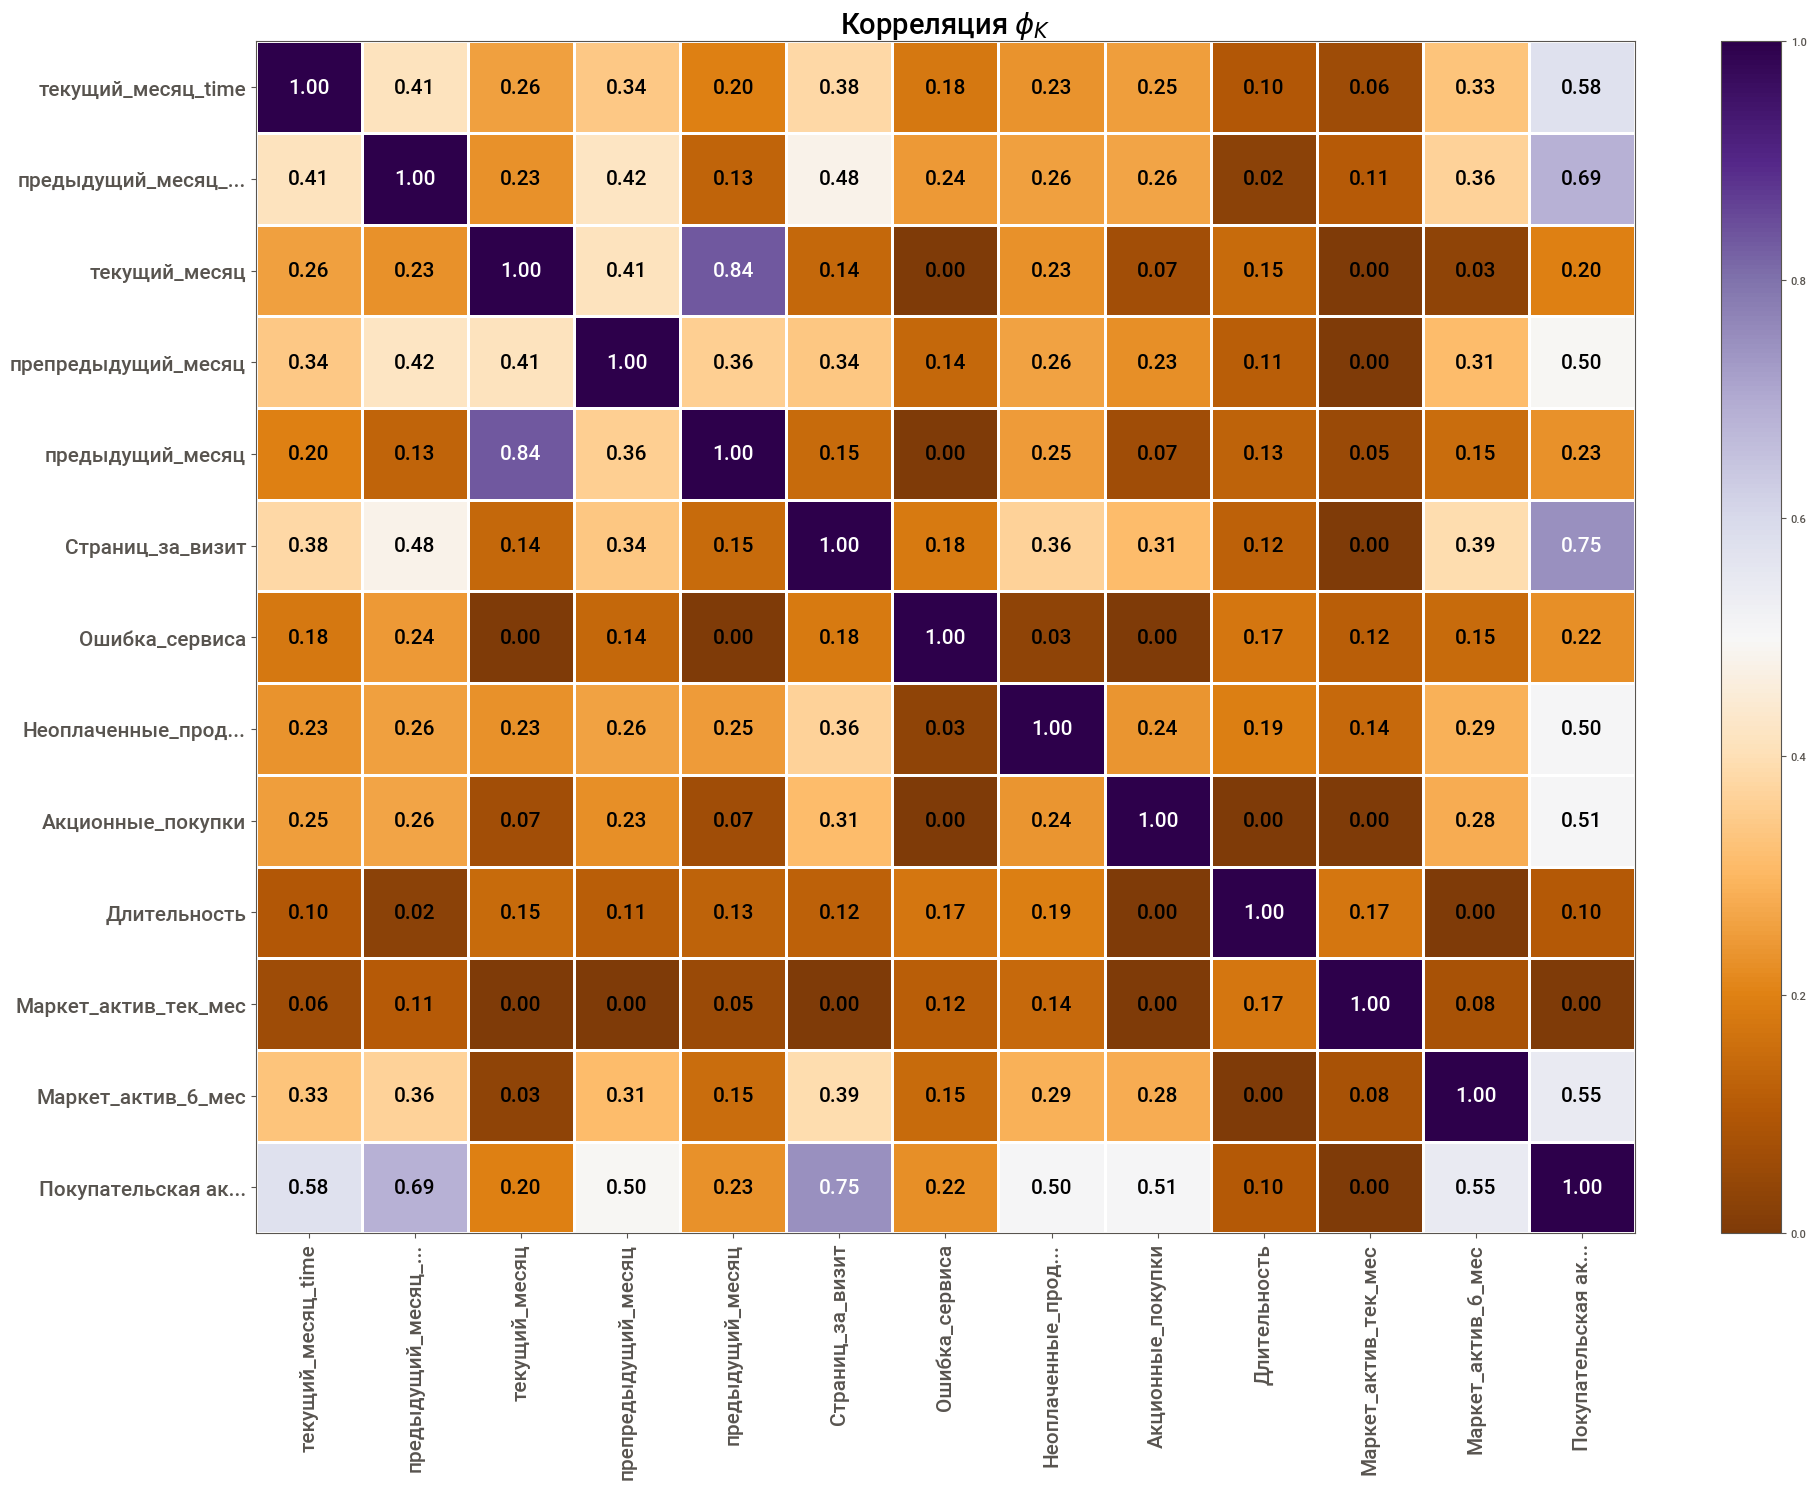

In [84]:
plot_correlation_matrix(
    corr_matrix_df.values,
    x_labels=corr_matrix_df.columns,
    y_labels=corr_matrix_df.index,
    vmin=0, vmax=1, color_map='PuOr', 
    title=r'Корреляция $\phi_K$',  
    fontsize_factor=1.5,  
    figsize=(20, 15)
)

Можно увидеть, что наиболее связаны с целевым 2 признака: 'Покупательская активность', 'предыдущий_месяц_time', 'текущий_месяц_time'

Линейная зависимость между признаками не наблюдается. Приступим к созданию pipline

Закодируем целевой признак для дальнейшей работы: покупательская активность не снизилась:0, снизилась: 1.

In [85]:
encoder = preprocessing. LabelEncoder ()
data_market_full['Покупательская активность'] = encoder.fit_transform(data_market_full['Покупательская активность'])
print(data_market_full['Покупательская активность'])

id
215349    1
215350    1
215351    1
215352    1
215353    1
         ..
216643    0
216644    0
216645    0
216646    0
216647    0
Name: Покупательская активность, Length: 1297, dtype: int32


In [86]:
print(data_market_full.columns.tolist())

['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц_time', 'текущий_месяц_time']


In [87]:
print(data_market_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1297 non-null   int32  
 1   Тип сервиса                          1297 non-null   object 
 2   Разрешить сообщать                   1297 non-null   object 
 3   Маркет_актив_6_мес                   1297 non-null   float32
 4   Маркет_актив_тек_мес                 1297 non-null   int8   
 5   Длительность                         1297 non-null   int16  
 6   Акционные_покупки                    1297 non-null   float32
 7   Популярная_категория                 1297 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1297 non-null   int8   
 9   Неоплаченные_продукты_штук_квартал   1297 non-null   int8   
 10  Ошибка_сервиса                       1297 non-null   int8   
 11  Страниц_за_визит            

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 6. Использование пайплайнов</strong></a><br>

Подготовим один общий пайплайн, с помощью которого подберем гиперпараметры, лучшую метрику и лучшую модель. Обучим четыре модели: KNeighborsClassifier(n_neighbors=17), DecisionTreeClassifier(random_state=42), LogisticRegression(solver='liblinear') и SVC(kernel = 'rbf') и выберем лучшую.

Площадь под ROC-кривой – один из самых популярных функционалов качества в задачах бинарной классификации.Когда решается задача классификации с двумя классами {0, 1}. Результат работы алгоритма на фиксированной тестовой выборке визуализируют с помощью ROC-кривой (ROC = receiver operating characteristic, иногда говорят «кривая ошибок»), а качество оценивают как площадь под этой кривой – AUC (AUC = area under the curve). Площадь под ROC-кривой равна доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил.

In [88]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# загружаем данные
#df_full = pd.read_csv('railway_full.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data_market_full.drop(
        [
            'Покупательская активность',
        ], 
        axis=1
    ),
    data_market_full['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data_market_full['Покупательская активность']
)


# создаём списки с названиями признаков
ohe_columns = [
    'Разрешить сообщать', 'Популярная_категория'   
]
ord_columns = [
    'Тип сервиса' 
]
num_columns = [
    'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 
    'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 
    'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 
    'Страниц_за_визит', 'предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц_time', 'текущий_месяц_time'
]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                   
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True,random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    },
    {
        'models': [GaussianNB()]  
    }
    ]
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    # задайте метрику ROC-AUC
    scoring='roc_auc', 
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)



Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                        

In [89]:
print(f'best params: {grid.best_params_}')
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)
#проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = grid.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

best params: {'models': SVC(probability=True, random_state=42), 'models__C': 1, 'preprocessor__num': RobustScaler()}
Метрика лучшей модели на тренировочной выборке: 0.9149400392127666
Метрика ROC-AUC на тестовой выборке: 0.8948202535708554


In [90]:
y_test_pred = grid.predict(X_test)

In [91]:
print(y_test_pred)

[0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1]


In [92]:
y_test_pr = grid.predict_proba(X_test)[:,1]
print(y_test_pr)

[0.51878328 0.77396686 0.07295888 0.75251672 0.97929279 0.09811522
 0.09672049 0.73966697 0.93640463 0.06802129 0.85255546 0.08551928
 0.15948558 0.99401885 0.43031641 0.06077466 0.0763078  0.0384964
 0.81461899 0.99272204 0.04312503 0.96387834 0.98398926 0.09757314
 0.97612203 0.11140715 0.28832262 0.89560129 0.94017211 0.11559474
 0.06161438 0.08673803 0.03827451 0.13341838 0.69426379 0.04492064
 0.16082619 0.77839797 0.17531547 0.07208775 0.96197648 0.16005245
 0.10840701 0.30434495 0.09982208 0.09901702 0.72888769 0.98643654
 0.96768662 0.05622755 0.3560903  0.94878419 0.88162539 0.05980249
 0.09903844 0.05980396 0.88558029 0.07266964 0.05732628 0.19283496
 0.34767313 0.04382803 0.9058654  0.97679564 0.81400605 0.26349838
 0.94909675 0.57886795 0.06033856 0.98099947 0.48591843 0.45244742
 0.48208579 0.03110339 0.11789136 0.97911263 0.06926114 0.99152321
 0.05974643 0.0747779  0.9408743  0.28088807 0.26670108 0.07224017
 0.97685756 0.99121144 0.05250069 0.09941802 0.04240101 0.19988

In [93]:
probabilities = grid.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Площадь ROC-кривой: 0.9213609372492376


С помощью инструмента поиска гиперпараметров GridSearchCV получили лучшую модель SVC(probability=True, random_state=42), метрика лучшей модели на тренировочной выборке: 0.92, ROC-AUC на тестовой выборке: 0.90, что само по себе неплохо. Обучили модель на тренировочных данных, рассчитали прогноз на тестовых данных.Рассчитали площадь ROC-кривой, которая равна 0,92, что еще раз говорит о хорошем качестве выбранной модели.

In [94]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred}) 
df

,Actual,Predicted
id,,
216446,0,0
215469,1,1
216301,0,0
215713,1,1
215500,1,1
...,...,...
215568,1,1
216119,0,0
215504,1,1


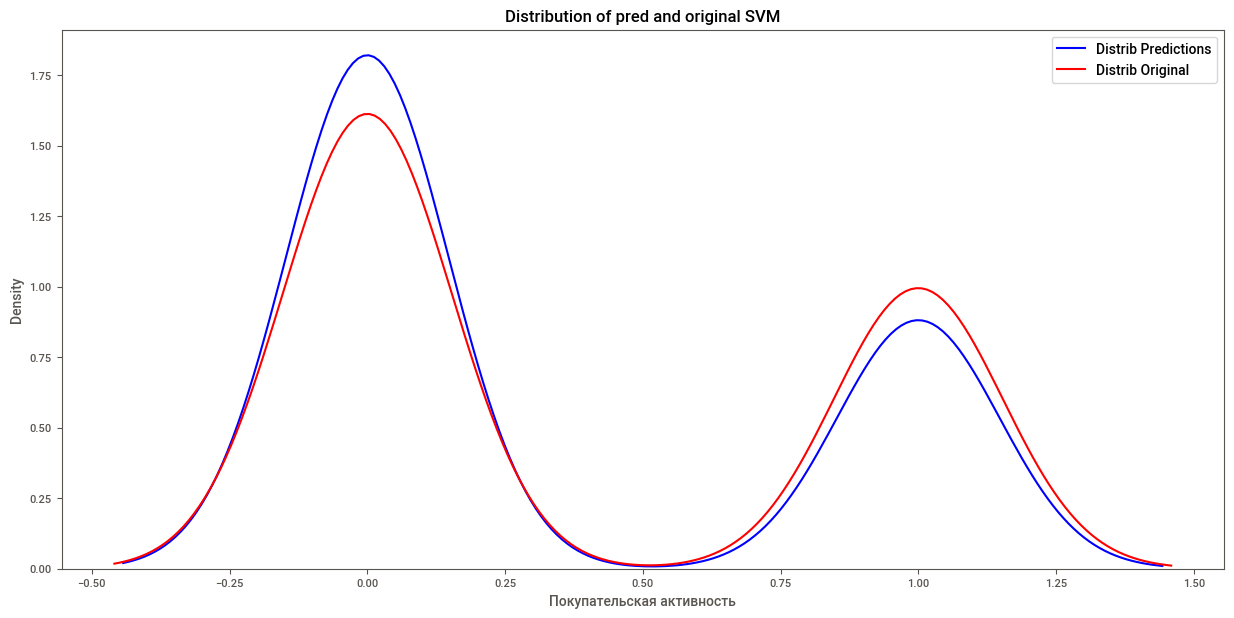

In [95]:
plt.figure(figsize=(15,7))
sns.distplot(y_test_pred, color="blue", label="Distrib Predictions", hist = False)
sns.distplot(y_test, color="red", label="Distrib Original", hist = False)
plt.title("Distribution of pred and original SVM")
plt.legend()

Анализ распределения предсказанных значений показывает, что модель работает, значений TN значительно больше чем TP что свидетельствует о том, что больше покупателей все-таки продолжают совершать покупки, и их покупательская активность осталась на прежнем уровне.

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 7. Анализ важности признаков</strong></a><br>

Лучшей моделью была выбрана модель SVC(random_state=42), модель опорных векторов.Посмотрим распределение признаков для такой модели с помощью SHAP.

In [96]:

#load JS vis in the notebook
shap.initjs() 
X_test_transformed = grid.best_estimator_.named_steps['preprocessor'].transform(X_test)
model = grid.best_estimator_.named_steps['models'].predict
X_train_transformed = grid.best_estimator_.named_steps['preprocessor'].transform(X_train)
explainer = shap.Explainer(model, X_train_transformed)


PermutationExplainer explainer: 326it [04:43,  1.13it/s]                                                               


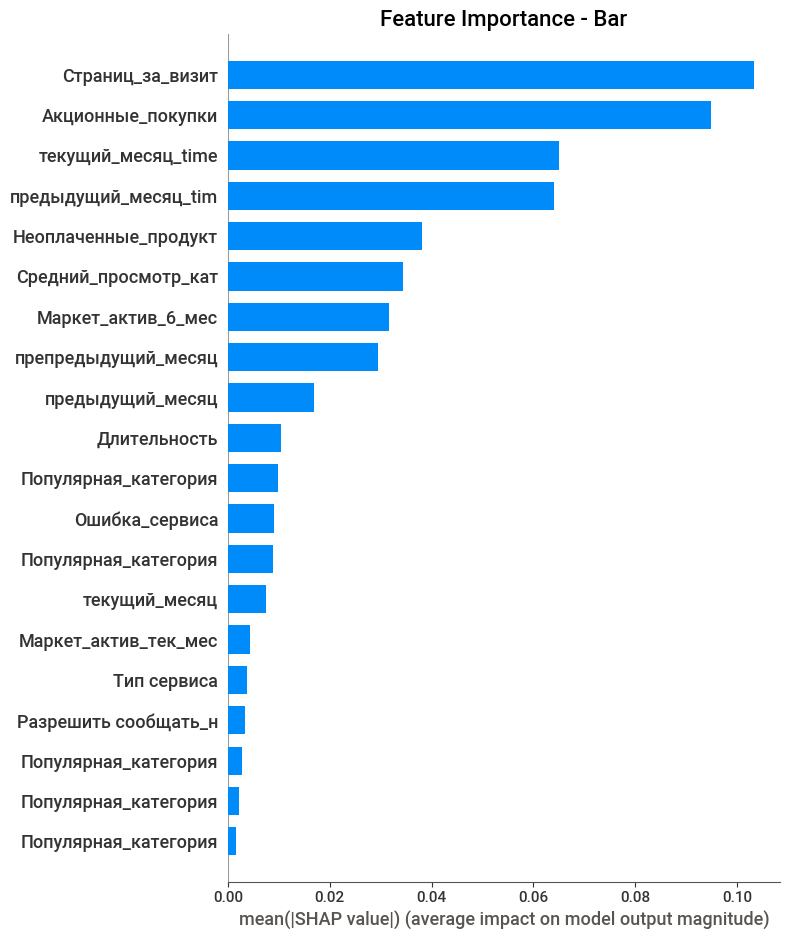

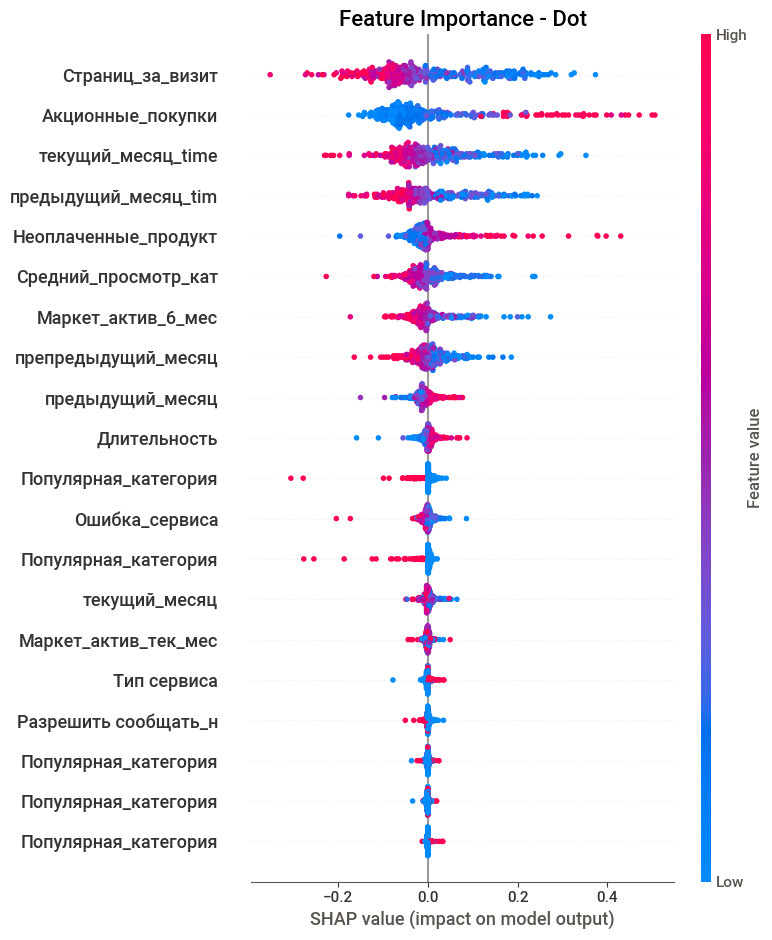

<Figure size 640x480 with 0 Axes>

In [97]:
shap_values = explainer.shap_values(X_test_transformed)
feature_names =list(map(lambda x: x.split('__')[1][:20],grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()))
plt.title("Feature Importance - Bar", fontsize=16)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar")
plt.title("Feature Importance - Dot", fontsize=16)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="dot");

# Adjust layout and display the plots side by side
plt.tight_layout()
plt.show()

Вышеприведенные графики показывают, что наибольшее влияние на target имеет признак: 'Страниц_за_визит', и второй, признак Акционные_покупки. Можно увидеть, что чем меньше страниц просматривает покупатель тем вероятнее снижение его покупательской активности. Всего мы включили в нашу модель 20 признаков. Также можно увидеть, что есть признаки, не оказывающие значительного влияния на целевой. Наличие таких признаков может как уличшить работу модели так и ухудшить ее. Я считаю, что удаление этих признаков нецелесообразно, т.к метрика нашей модели и так достаточно высока.

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 8. Сегментация покупателей</strong></a><br>

Выполним сегментацию покупателей, для этого соединим датафрейм с прибылью и датафрейм с полученными предсказаниями, и на основании графического решения определим границы сегмента. Затем исследуем сегмент графически и сделаем выводы.

In [98]:
index_names_4 = data_money[ (data_market_time['id'] == 215348) | (data_money['id'] == 215357)| (data_money['id'] == 215359)].index 
  
# drop these row indexes 
# from dataFrame 
data_money.drop(index_names_4, inplace = True)

In [99]:
print(len(y_test_pr))

325


In [100]:
df['Pred'] = y_test_pr

In [101]:
df

,Actual,Predicted,Pred
id,,,
216446,0,0,0.518783
215469,1,1,0.773967
216301,0,0,0.072959
215713,1,1,0.752517
215500,1,1,0.979293
...,...,...,...
215568,1,1,0.931391
216119,0,0,0.108005
215504,1,1,0.947692


In [102]:
data_money

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


In [103]:
data_money_t = data_money.set_index('id')

In [104]:
data_money_full = data_money_t.join(df)

In [105]:
data_money_full

,Прибыль,Actual,Predicted,Pred
id,,,,
215348,0.98,NaN,NaN,NaN
215349,4.16,1.0,1.0,0.988305
215350,3.13,NaN,NaN,NaN
215351,4.87,1.0,1.0,0.850497
215352,4.21,NaN,NaN,NaN
...,...,...,...,...
216643,4.44,NaN,NaN,NaN
216644,6.11,NaN,NaN,NaN
216645,3.29,0.0,0.0,0.066183


In [106]:
data_money_full = data_money_full.dropna ()

In [107]:
data_money_full = data_money_full.join(data_market_full)

In [108]:
data_money_full

,Прибыль,Actual,Predicted,Pred,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_time,текущий_месяц_time
id,,,,,,,,,,,,,,,,,,,,,
215349,4.16,1.0,1.0,0.988305,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.600098,12,10
215351,4.87,1.0,1.0,0.850497,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.399902,11,13
215353,3.95,1.0,1.0,0.749120,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.500000,10,10
215354,3.62,1.0,1.0,0.837962,1,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.600098,11,12
215355,5.26,1.0,0.0,0.306969,1,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.600098,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216631,4.61,0.0,0.0,0.099822,0,стандарт,да,3.0,3,455,0.24,Кухонная посуда,5,0,7,7,4582.0,4735.0,4844.600098,17,17
216636,4.25,0.0,1.0,0.906759,0,премиум,да,2.4,4,996,0.23,Кухонная посуда,3,4,5,6,5644.5,4860.0,6454.399902,10,14
216641,4.50,0.0,0.0,0.060149,0,стандарт,да,4.1,4,638,0.22,Техника для красоты и здоровья,4,1,6,14,5654.5,5176.0,6199.200195,14,12


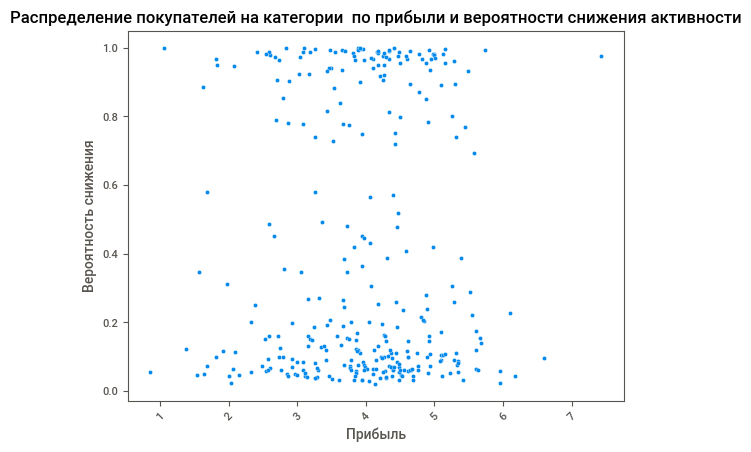

In [109]:
total_data_gr = sns.scatterplot(x='Прибыль', y='Pred', data=data_money_full);
plt.title('Распределение покупателей на категории  по прибыли и вероятности снижения активности');
plt.xlabel('Прибыль');
plt.ylabel('Вероятность снижения');
plt.xticks(rotation=45);

График показывает, что мы можем сделать срез по прибыли от 2,5до 5,5. И исследовать получившийся сегмент

In [110]:
data_money_full_good = data_money_full.query('2.5 < Прибыль < 5.5')

In [111]:
data_money_full_good

,Прибыль,Actual,Predicted,Pred,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_time,текущий_месяц_time
id,,,,,,,,,,,,,,,,,,,,,
215349,4.16,1.0,1.0,0.988305,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.600098,12,10
215351,4.87,1.0,1.0,0.850497,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.399902,11,13
215353,3.95,1.0,1.0,0.749120,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.500000,10,10
215354,3.62,1.0,1.0,0.837962,1,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.600098,11,12
215355,5.26,1.0,0.0,0.306969,1,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.600098,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216626,4.45,0.0,0.0,0.476329,0,премиум,да,3.9,4,488,0.32,Домашний текстиль,2,5,3,8,4931.5,4690.0,5270.799805,14,21
216631,4.61,0.0,0.0,0.099822,0,стандарт,да,3.0,3,455,0.24,Кухонная посуда,5,0,7,7,4582.0,4735.0,4844.600098,17,17
216636,4.25,0.0,1.0,0.906759,0,премиум,да,2.4,4,996,0.23,Кухонная посуда,3,4,5,6,5644.5,4860.0,6454.399902,10,14


In [112]:
data_money_full_good[['Прибыль', 'Страниц_за_визит']].describe().style.background_gradient(cmap = 'copper')

,Прибыль,Страниц_за_визит
count,284.000000,284.000000
mean,4.030000,7.919014
std,0.753631,4.054896
min,2.530000,1.000000
25%,3.467500,5.000000
50%,4.100000,8.000000
75%,4.565000,11.000000
max,5.490000,20.000000


Для подготовки рекомендаций исследуем этот сегмент покупателей, его потребности

In [113]:
data_money_full_good.reset_index(inplace= True , level = ['id'])

Название столбца: Популярная_категория


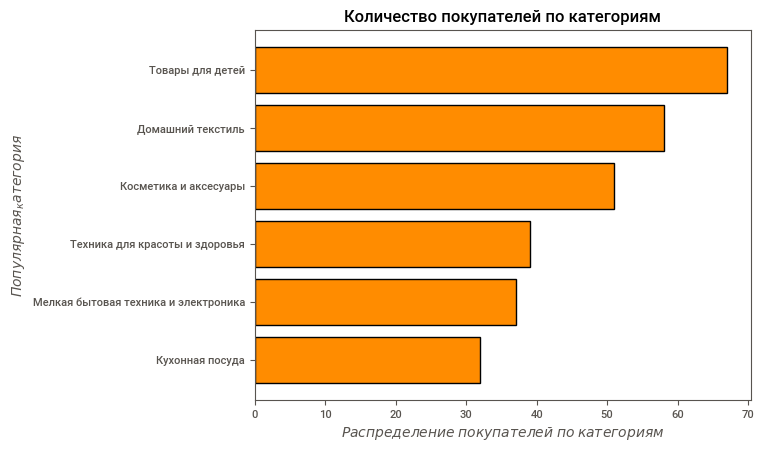

Значения датафрейма:
                                      Количество      Доля
Популярная_категория                                      
Кухонная посуда                               32  0.112676
Мелкая бытовая техника и электроника          37  0.130282
Техника для красоты и здоровья                39  0.137324
Косметика и аксесуары                         51  0.179577
Домашний текстиль                             58  0.204225
Товары для детей                              67  0.235915

Описание датафрейма:
       Количество      Доля
count    6.000000  6.000000
mean    47.333333  0.166667
std     13.603921  0.047901
min     32.000000  0.112676
25%     37.500000  0.132042
50%     45.000000  0.158451
75%     56.250000  0.198063
max     67.000000  0.235915


In [114]:
quality_data_market(
    data_money_full_good, 
    'Популярная_категория', 
    'Распределение_ покупателей_ по_ категориям', 
    'Популярная_категория', 
    'Количество покупателей по категориям'
)

Название столбца: Тип сервиса


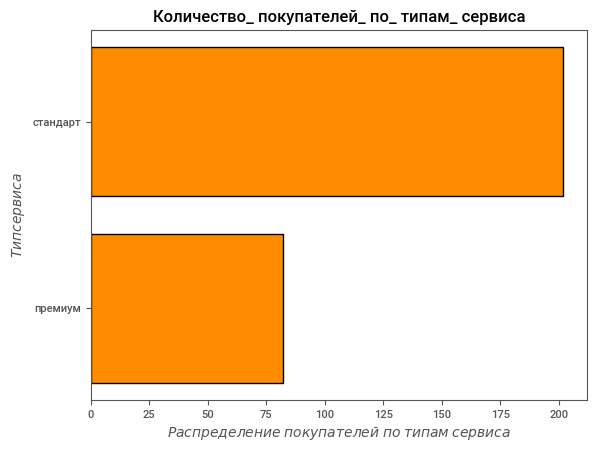

Значения датафрейма:
             Количество      Доля
Тип сервиса                      
премиум              82  0.288732
стандарт            202  0.711268

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   142.000000  0.500000
std     84.852814  0.298778
min     82.000000  0.288732
25%    112.000000  0.394366
50%    142.000000  0.500000
75%    172.000000  0.605634
max    202.000000  0.711268


In [115]:
quality_data_market(
    data_money_full_good, 
    'Тип сервиса', 
    'Распределение_ покупателей_ по_ типам_ сервиса', 
    'Тип сервиса', 
    'Количество_ покупателей_ по_ типам_ сервиса'
)

Название столбца: Разрешить сообщать


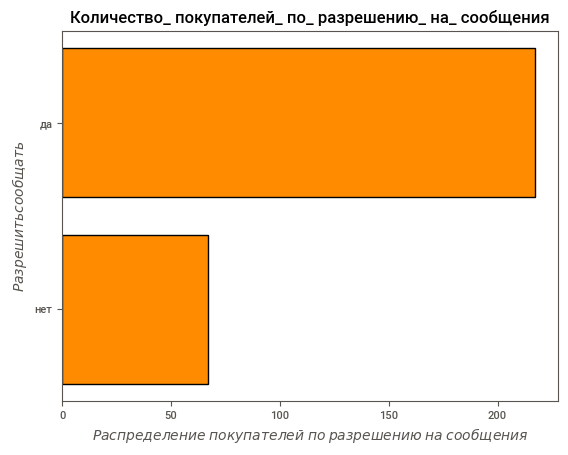

Значения датафрейма:
                    Количество      Доля
Разрешить сообщать                      
нет                         67  0.235915
да                         217  0.764085

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   142.000000  0.500000
std    106.066017  0.373472
min     67.000000  0.235915
25%    104.500000  0.367958
50%    142.000000  0.500000
75%    179.500000  0.632042
max    217.000000  0.764085


In [116]:
quality_data_market(
    data_money_full_good, 
    'Разрешить сообщать', 
    'Распределение_ покупателей_ по_ разрешению_ на_ сообщения', 
    'Разрешить сообщать', 
    'Количество_ покупателей_ по_ разрешению_ на_ сообщения'
)

Приведенные графики показывают, что покупатели из наиболее популярной категории предпочитают покупать товары для детей, стандартного типа обслуживания, получающие рассылку магазина. Считаю, что большинство из них женщины, имеющие детей. Для решения поставленной задачи необходимо разработать персональные предложения с целью повышения активности данной категории покупателей: возможно предусмотреть какие-то акционные мероприятия по лидирующей категории товаров, проработать условия для каких-то дополнительных льгот.

## <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 9. Общий вывод</strong></a><br>

Перед нами была поставлена задача: поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Исходные данные: четыре датафрейма, которые были выгружены, произведена предобработка данных, позволившая снизить вес датафреймов в среднем на 35%. устранены дубликаты, изменен тип данных столбцов некоторые датафреймы транспортированы. Проведен исследовательский анализ данных: построены графики. После проведенной предобработки три датафрейма были соеденены в один. Удалены некоторые столбцы для исключения мультиколлинеарности. И приступили к разработке pipline. 

1. С помощью инструмента поиска гиперпараметров GridSearchCV получили лучшую модель SVC(random_state=42), метрика лучшей модели на тренировочной выборке: 0.92, ROC-AUC на тестовой выборке: 0.90, что само по себе неплохо. Обучили модель на тренировочных данных, рассчитали прогноз на тестовых данных.
2. Анализ распределения предсказанных значений показывает, что модель работает, значений TN значительно больше чем TP что свидетельствует о том, что больше покупателей все-таки продолжают совершать покупки, и их покупательская активность осталась на прежнем уровне.
3. Построенные с помощью SHAP графики показывают, что наибольшее влияние на target имеет признак: 'Акционные_покупки', и второй, признак показывающий сколько страниц просматривает покупатель, заходя на сайт магазина. Можно увидеть, что чем меньше страниц просматривает покупатель тем вероятнее снижение его покупательской активности. Второй по значимости признак: Всего мы включили в нашу модель 20 признаков. Также можно увидеть, что есть признаки, не оказывающие значительного влияния на целевой. Наличие таких признаков может как уличшить работу модели так и ухудшить ее. Я считаю, что удаление этих признаков нецелесообразно, т.к метрика нашей модели и так достаточно высока.
4. Провели сегментацию покупателей, выделив сегмент покупателей, совершающих наиболее дорогие покупки и имеющих количество просмотра страниц ниже среднего.
5. Был изучен сегмен этих покупателей. С помощью графических решений было выявлено, что покупатели из Категории предпочитают покупать косметику и аксессуары, стандартного типа обслуживания, получающие рассылку магазина. Считаю, что большинство из них женщины. Для решения поставленной задачи необходимо разработать персональные предложения с целью повышения активности данной категории покупателей: возможно предусмотреть какие-то акционные мероприятия по лидирующей категории товаров, проработать условия для каких-то дополнительных льгот.
6. Приведенные графики показывают, что покупатели из Категории предпочитают покупать товары для детей, стандартного типа обслуживания, получающие рассылку магазина. Считаю, что большинство из них женщины, имеющие детей. Для решения поставленной задачи необходимо разработать персональные предложения с целью повышения активности данной категории покупателей: возможно предусмотреть какие-то акционные мероприятия по лидирующей категории товаров, проработать условия для каких-то дополнительных льгот.